# Data Load and Process:- using Pytorch

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [3]:
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=9, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=9, shuffle=False)

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
x, y = data[1][0], data[1][0]
print(y)

tensor(2)


In [7]:
print(data[1])

tensor([2, 8, 7, 6, 9, 1, 9, 7, 7])


In [8]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


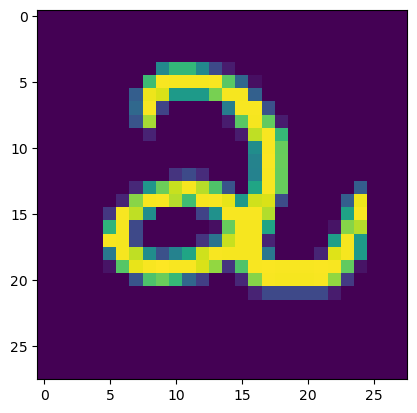

In [9]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()

In [10]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [11]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


# Build Model with Neural Network 

In [12]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class Wast(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    
wast = Wast()
print(wast)
Wast()

Wast(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


Wast(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [14]:
x=torch.rand(28,28)
x

tensor([[3.2566e-01, 8.0415e-01, 2.6296e-01, 7.3608e-01, 8.0605e-01, 9.8672e-01,
         1.3453e-01, 3.9773e-01, 1.6301e-01, 8.0188e-01, 2.2167e-01, 6.9923e-01,
         8.4252e-01, 3.8105e-02, 7.8446e-01, 5.0250e-02, 1.1986e-01, 7.4875e-01,
         1.0981e-01, 8.2303e-01, 2.9852e-01, 5.5907e-01, 4.9742e-01, 7.3047e-01,
         2.5503e-01, 6.9165e-03, 1.2128e-02, 6.0520e-01],
        [3.7815e-01, 5.7413e-01, 3.6913e-01, 4.9541e-01, 7.3878e-01, 6.7381e-01,
         2.8139e-01, 1.0086e-01, 5.2176e-01, 2.8551e-01, 7.1591e-01, 1.5222e-01,
         9.3297e-02, 3.7062e-01, 4.4157e-01, 5.6091e-01, 4.6964e-02, 5.1892e-01,
         4.7492e-01, 2.7603e-01, 1.8723e-02, 8.7712e-01, 2.2343e-01, 5.2217e-01,
         1.9203e-01, 4.7464e-01, 3.2481e-01, 3.6636e-01],
        [4.1897e-01, 2.5138e-01, 2.6217e-02, 4.4762e-01, 5.3910e-01, 5.0455e-01,
         7.6804e-01, 8.7602e-01, 2.4820e-01, 5.2645e-01, 4.1066e-01, 3.2133e-01,
         3.7703e-01, 3.6765e-01, 7.6448e-01, 7.3240e-02, 6.9939e-01, 7.919

In [15]:
x=torch.rand(28,28)
x=x.view(1,28*28)

In [16]:
result = wast(x)

In [17]:
result

tensor([[-2.2633, -2.3509, -2.3043, -2.2679, -2.4526, -2.1957, -2.3290, -2.4171,
         -2.2949, -2.1834]], grad_fn=<LogSoftmaxBackward0>)

# Training Model

In [18]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(wast.parameters(), lr=0.001)
EPOCHS = 1

In [19]:
for epoch in range(EPOCHS):
    for data in trainset:  
        x, y = data 
        wast.zero_grad()  
        result = wast(x.view(-1,784)) 
        loss = F.nll_loss(result, y)  
        loss.backward() 
        optimizer.step()
    print(loss)

tensor(0.0156, grad_fn=<NllLossBackward0>)


In [20]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        x, y = data
        result = wast(x.view(-1,28*28))
        
        for idx, i in enumerate(result):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.955


In [21]:
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0314, 0.4588, 0.9961, 0.8627, 0.3490, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0510,
           0.3725, 0.8314, 0.9922, 0.9922, 

In [22]:
plt.imshow(x[0].view(28,28))
plt.show()

In [23]:
print(torch.argmax(wast(x[0].view(-1,784))[0]))

tensor(6)


# Making Conv:- Pytorch

In [24]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [25]:
REBUILD_DATA = True

In [26]:
class DogsVSCats():
    img_size = 80
    cat='ani_dataset/Cat'
    dog='ani_dataset/Dog'
    labels = {cat: 0, dog: 1}
    img_data = []
    label_data = []
    catcount=0
    dogcount=0
    
    def make_training_data(self):
        for label in self.labels:
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.img_size, self.img_size))
                        label_id = self.labels[label]
                        one_label = np.eye(2)[label_id]
                        self.img_data.append(np.array(img))
                        self.label_data.append(one_label)
                        if label == self.cat:
                            self.catcount += 1
                        if label == self.dog:
                            self.dogcount += 1
                            
                    except Exception as e:
                        pass
                    
        self.img_data = np.array(self.img_data)
        self.label_data = np.array(self.label_data)
        np.save("img_data.npy", self.img_data)
        np.save("label_data.npy", self.label_data)
        print('cat:', self.catcount)
        print('dog:', self.dogcount)

In [27]:
if REBUILD_DATA:
    dogvscat = DogsVSCats()
    dogvscat.make_training_data()

100%|█████████████████████████████████████████████████████████████████████████████| 1172/1172 [00:01<00:00, 784.50it/s]

cat: 1197
dog: 1171


2368
2368
[[114 120 115 ...  73  79  71]
 [ 86  96  93 ...  81  74  57]
 [ 90  97  87 ...  91  55  49]
 ...
 [ 97  67  61 ...  82  80  85]
 [ 77  56  57 ...  87  78  78]
 [ 59  52  58 ...  89  96  84]]


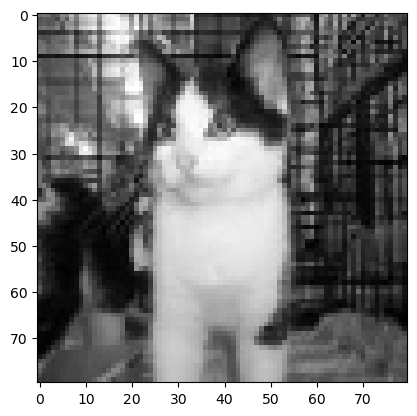

In [28]:
img_data = np.load("img_data.npy", allow_pickle=True)
label_data = np.load("label_data.npy", allow_pickle=True)

print(len(img_data))
print(len(label_data))
print(img_data[3])

plt.imshow(img_data[3], cmap='gray')
plt.show()


# Training neural Network:-

In [29]:
import torch.nn.functional as F
class Wast(nn.Module):
    def __init__(self):
        super().__init__() 
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(80,80).view(-1,1,80,80)
        self._to_linear = None
        self.convs(x)
        
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)
    
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
    
wast = Wast()
print(wast)

print(img_data.shape)

Wast(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=4608, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)
(2368, 80, 80)


In [30]:
import torch.optim as optim

optimizer = optim.Adam(wast.parameters(), lr=0.001)
loss_function = nn.MSELoss()

In [31]:
import numpy as np

x = torch.from_numpy(img_data).float().view(-1,80, 80)
x = x/255.0
y = torch.Tensor([i[1] for i in label_data])

In [32]:
VAL_PKT = 0.1  
val_size = int(len(x)*VAL_PKT)
print(val_size)

236


In [33]:
train_x = x[:-val_size]
train_y = y[:-val_size]

test_x = x[-val_size:]
test_y = y[-val_size:]

print(len(train_x), len(test_x))
print(len(train_y), len(test_y))

2132 236
2132 236


In [34]:
Batch_size = 12
EPOCHS = 1

In [35]:
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_x), Batch_size)): 
        batch_x = train_x[i:i+Batch_size].view(-1, 1, 80, 80)
        batch_y = train_y[i:i+Batch_size]
        batch_y = batch_y.view(-1, 1)  

        wast.zero_grad()
        result = wast(batch_x)
        
        loss = loss_function(result, batch_y)
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch}. Loss: {loss}")

  0%|                                                                                          | 0/178 [00:00<?, ?it/s]D:\Anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12, 1])) that is different to the input size (torch.Size([12, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
 99%|███████████████████████████████████████████████████████████████████████████████▌| 177/178 [00:24<00:00,  7.17it/s]D:\Anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|████████████████████████████████████████████████████████████████████████████████| 1

Epoch: 0. Loss: 0.2500000596046448


In [36]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_x))):
        real_class = torch.argmax(test_y[i])
        wastt = wast(test_x[i].view(-1, 1, 80, 80))[0] 
        predicted_class = torch.argmax(wastt)
        

        if predicted_class == real_class:
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))

100%|███████████████████████████████████████████████████████████████████████████████| 236/236 [00:01<00:00, 170.03it/s]

Accuracy:  0.636


# Working on Deep learning Process in PyTorch using [CPU/GPU] 
We need High-End GPU for process Deep Learming PyTorch work Because CPU working process is very slow rether then GPU.
NVIDIA GPUs is Good option for doing Deep Learming PyTorch process.

In [37]:
device = torch.device("cpu:0")
device

device(type='cpu', index=0)

In [38]:
if torch.cuda.is_available():
    device = torch.device("cuda:0") 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the CPU


In [39]:
wast.to(device)

Wast(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=4608, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [40]:
wast = Wast().to(device)

In [41]:
def train(wast):
    optimizer = optim.Adam(wast.parameters(), lr=0.001)
    BATCH_SIZE = 16 
    EPOCHS = 2
    for epoch in range(EPOCHS):
        for i in range(0, len(train_x), BATCH_SIZE): 

            batch_x = train_x[i:i+BATCH_SIZE].view(-1, 1, 80, 80)
            batch_y = train_y[i:i+BATCH_SIZE]
            batch_y = batch_y.view(-1, 1) 

            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            wast.zero_grad()

            optimizer.zero_grad()   
            result = wast(batch_x)
            loss = loss_function(result, batch_y)
            loss.backward()
            optimizer.step()

        print(f"Epoch: {epoch}. Loss: {loss}")

train(wast)

D:\Anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0. Loss: 0.25000038743019104
Epoch: 1. Loss: 0.25


In [42]:
test_x.to(device)
test_y.to(device)

def test(wast):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_x))):
            real_class = torch.argmax(test_y[i]).to(device)
            wastt = wast(test_x[i].view(-1, 1, 80, 80).to(device))[0] 
            predicted_class = torch.argmax(wastt)

            if predicted_class == real_class:
                correct += 1
            total += 1

    print("Accuracy: ", round(correct/total, 3))

test(wast)

100%|███████████████████████████████████████████████████████████████████████████████| 236/236 [00:01<00:00, 156.50it/s]

Accuracy:  0.203


In [43]:
def fwd_pass(x, y, train=False):
    if train:
        wast.zero_grad()
    result = wast(x)
    matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(result, y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(result, y)

    if train:
        loss.backward()
        optimizer.step()

    return acc, loss

In [44]:
def testing(size = 2):
    random_start = np.random.randint(len(test_x)-size)
    x,y = test_x[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch. no_grad():
        val_acc, val_loss = fwd_pass(x.view(-1,1,80,80).to(device), y.to(device))
    return val_acc, val_loss

val_acc, val_loss = testing(size=2)
print(val_acc, val_loss)

D:\Anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0.0 tensor(0.2500)


In [45]:
import time

new_model = f"model-{int(time.time())}" 
wast = wast.to(device)
optimizer = optim.Adam(wast.parameters(), lr=0.001)
loss_function = nn.MSELoss()
print(new_model)

model-1708512705


In [46]:
def training():
    size_of_batch = 20
    EPOCHS = 3
    with open("model.log", "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_x), size_of_batch)):
                batch_x = train_x[i:i+size_of_batch].view(-1,1,80,80).to(device)
                batch_y = train_y[i:i+size_of_batch].to(device)
                batch_y = batch_y.view(-1, 1)
                acc, loss = fwd_pass(batch_x, batch_y, train=True)
                
                if i%80 == 0:
                    val_acc, val_loss = testing(size=1)
                    f.write(f"{new_model},{round(time.time(),3)},{round(float(acc),2)},{round(float(loss),4)},{round(float(val_acc),2)},{round(float(val_loss),2)} \n")
                    
training()
        

  0%|                                                                                          | 0/107 [00:00<?, ?it/s]D:\Anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|████████████████████████████████████████████████████████████████████████████████| 107/107 [00:21<00:00,  4.88it/s]


# Visualization of our whole model logs using (MATPLOTLIB) library

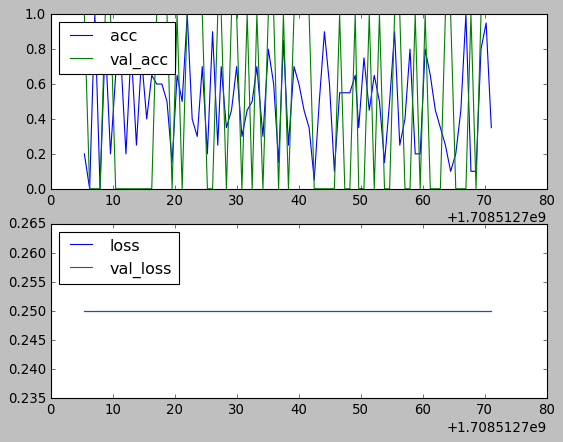

In [56]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("classic")
model_name = "model-1708512705"

def create_acc_loss_graph(model_name):
    new1 = open("model.log", "r").read().split("\n")

    times = []
    accuracies = []
    losses = []
    val_accs = []
    val_losses =[]
    
    for i in new1:
        if model_name in i:
            name, timestamp, acc, loss, val_acc, val_loss = i.split(",")

            times.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))
            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))
            
    fig = plt.figure()

    a1 = plt.subplot2grid((2,1), (0,0))
    a2 = plt.subplot2grid((2,1), (1,0), sharex=a1)

    a1.plot(times, accuracies, label="acc")
    a1.plot(times, val_accs, label="val_acc")
    a1.legend(loc=2)
    
    a2.plot(times,losses, label="loss")
    a2.plot(times,val_losses, label="val_loss")
    a2.legend(loc=2)
    
    plt.show()

create_acc_loss_graph(model_name)